array([[  18.17777778, 3606.74603175],
       [  15.8787037 , 4952.77777778]])

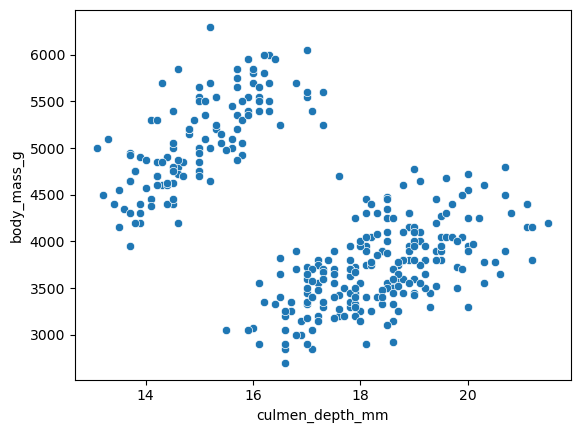

In [11]:
import bs4 as bs
#import random
import pandas as pd
import seaborn as sb
import numpy as np
#import datetime
import requests as rq
import pickle
import math
#import json
#import time
#from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

def save_pickle(file, value):
    pickle.dump(value, open(file, "wb"))
def load_pickle(file):
    return pickle.load(open(file, "rb"))

data = pd.read_csv("penguins.csv")

data.dropna(inplace=True)

sb.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g')


train_df, _ = train_test_split(data, test_size=0.3, random_state=42)
train_df = train_df[["culmen_depth_mm", "body_mass_g"]]
train_df.head()

model = KMeans(n_clusters=2)
model.fit(train_df)
model.cluster_centers_